In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

from models import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
# Load data
train = np.genfromtxt('./data/training.csv', delimiter=',')
test = np.genfromtxt('./data/testing.csv', delimiter=',')

# Training data params
n_classes = 4 # Number of classes 
n_features = 27 # Number of features

In [61]:
# Divide the training data set
x_train, x_test = train[:,1:], test[:,1:]
y_train, y_test = train[:,0].astype(int), test[:,0].astype(int)
y_train, y_test = one_hot(y_train, n_classes), one_hot(y_test, n_classes) # One hot encoding

# Preprocessing - Standarization - zero mean and unit variance
# Recall that the mean and std come from the training set  
x_train, x_test = standarization(x_train, x_test) 

## Ex 1.5 - Multinomial logistic regression - GD

iter : 100/1000 - train_loss = 86.89, train_acc = 0.95, test_loss = 210.61, test_acc = 0.81
iter : 200/1000 - train_loss = 57.64, train_acc = 0.96, test_loss = 183.01, test_acc = 0.82
iter : 300/1000 - train_loss = 45.07, train_acc = 0.96, test_loss = 173.39, test_acc = 0.82
iter : 400/1000 - train_loss = 37.90, train_acc = 0.96, test_loss = 169.03, test_acc = 0.82
iter : 500/1000 - train_loss = 33.18, train_acc = 0.96, test_loss = 166.86, test_acc = 0.83
iter : 600/1000 - train_loss = 29.79, train_acc = 0.96, test_loss = 165.81, test_acc = 0.83
iter : 700/1000 - train_loss = 27.21, train_acc = 0.97, test_loss = 165.38, test_acc = 0.83
iter : 800/1000 - train_loss = 25.17, train_acc = 0.97, test_loss = 165.33, test_acc = 0.84
iter : 900/1000 - train_loss = 23.50, train_acc = 0.97, test_loss = 165.54, test_acc = 0.84
iter : 1000/1000 - train_loss = 22.10, train_acc = 0.97, test_loss = 165.92, test_acc = 0.84



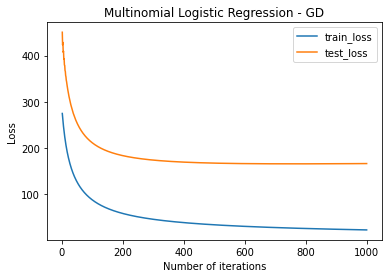

In [62]:
max_iters = 1000 # Maximum number of iterations
alpha = 0.0001 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization

losses_train, losses_test, thetas = gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, print_res_each=100)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - GD')
plt.legend();

## 1.7 - Multinomial logistic regression - SGD

### 1.7.1 SGD - Batch_size = 1

iter : 500/5000 - train_loss = 170.34, train_acc = 0.93, test_loss = 312.27, test_acc = 0.78
iter : 1000/5000 - train_loss = 132.93, train_acc = 0.82, test_loss = 285.20, test_acc = 0.71
iter : 1500/5000 - train_loss = 105.67, train_acc = 0.90, test_loss = 234.61, test_acc = 0.78
iter : 2000/5000 - train_loss = 94.06, train_acc = 0.91, test_loss = 226.71, test_acc = 0.75
iter : 2500/5000 - train_loss = 76.10, train_acc = 0.95, test_loss = 196.62, test_acc = 0.82
iter : 3000/5000 - train_loss = 76.47, train_acc = 0.92, test_loss = 209.07, test_acc = 0.78
iter : 3500/5000 - train_loss = 62.62, train_acc = 0.96, test_loss = 191.07, test_acc = 0.82
iter : 4000/5000 - train_loss = 57.95, train_acc = 0.95, test_loss = 182.52, test_acc = 0.81
iter : 4500/5000 - train_loss = 52.84, train_acc = 0.96, test_loss = 180.42, test_acc = 0.82
iter : 5000/5000 - train_loss = 50.13, train_acc = 0.96, test_loss = 175.69, test_acc = 0.83



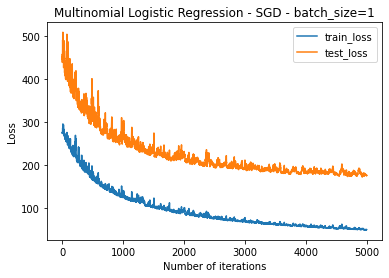

In [63]:
max_iters = 5000 # Maximum number of iterations
alpha = 0.001 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 1 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=500)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();

### 1.7.2 SGD - Batch_size = 16

iter : 500/5000 - train_loss = 37.81, train_acc = 0.97, test_loss = 173.75, test_acc = 0.81
iter : 1000/5000 - train_loss = 25.52, train_acc = 0.96, test_loss = 165.14, test_acc = 0.83
iter : 1500/5000 - train_loss = 19.89, train_acc = 0.98, test_loss = 166.13, test_acc = 0.84
iter : 2000/5000 - train_loss = 16.40, train_acc = 0.97, test_loss = 172.08, test_acc = 0.84
iter : 2500/5000 - train_loss = 15.23, train_acc = 0.98, test_loss = 181.97, test_acc = 0.83
iter : 3000/5000 - train_loss = 13.22, train_acc = 0.98, test_loss = 176.96, test_acc = 0.84
iter : 3500/5000 - train_loss = 12.70, train_acc = 0.99, test_loss = 180.84, test_acc = 0.84
iter : 4000/5000 - train_loss = 11.24, train_acc = 0.99, test_loss = 183.07, test_acc = 0.85
iter : 4500/5000 - train_loss = 10.35, train_acc = 0.99, test_loss = 190.86, test_acc = 0.83
iter : 5000/5000 - train_loss = 9.31, train_acc = 0.99, test_loss = 190.68, test_acc = 0.84



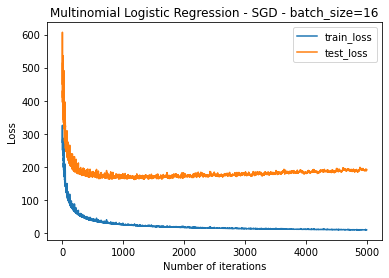

In [64]:
max_iters = 5000 # Maximum number of iterations
alpha = 0.001 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 16 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=500)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();

### 1.7.3 SGD - Batch_size = 32

iter : 100/1000 - train_loss = 83.77, train_acc = 0.93, test_loss = 217.73, test_acc = 0.78
iter : 200/1000 - train_loss = 54.50, train_acc = 0.97, test_loss = 190.56, test_acc = 0.80
iter : 300/1000 - train_loss = 41.33, train_acc = 0.96, test_loss = 167.56, test_acc = 0.82
iter : 400/1000 - train_loss = 34.45, train_acc = 0.97, test_loss = 167.85, test_acc = 0.82
iter : 500/1000 - train_loss = 31.45, train_acc = 0.98, test_loss = 170.48, test_acc = 0.84
iter : 600/1000 - train_loss = 28.38, train_acc = 0.96, test_loss = 164.42, test_acc = 0.83
iter : 700/1000 - train_loss = 25.35, train_acc = 0.96, test_loss = 168.36, test_acc = 0.83
iter : 800/1000 - train_loss = 23.41, train_acc = 0.97, test_loss = 169.87, test_acc = 0.84
iter : 900/1000 - train_loss = 21.85, train_acc = 0.98, test_loss = 165.56, test_acc = 0.83
iter : 1000/1000 - train_loss = 20.50, train_acc = 0.97, test_loss = 171.67, test_acc = 0.83



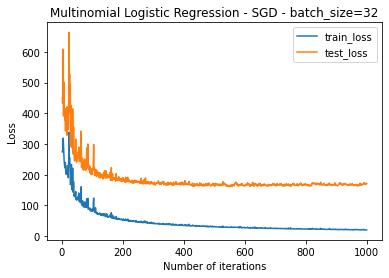

In [65]:
max_iters = 1000 # Maximum number of iterations
alpha = 0.0007 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 32 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=100)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();